<a href="https://colab.research.google.com/github/Umaporn19/Project/blob/main/TestTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import numpy as np

In [66]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [67]:
df = pd.read_csv (r'/content/drive/MyDrive/data/Test.csv')
df

,Unnamed: 0,Path_Name,id,Part
0,0,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
1,1,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
2,2,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
3,3,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
4,4,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
...,...,...,...,...
190090,190090,/content/drive/My Drive/id/id12/Base/p05/dis1....,id12,p05
190091,190091,/content/drive/My Drive/id/id12/Base/p06/dis1....,id12,p06
190092,190092,/content/drive/My Drive/id/id12/Base/p07/dis1....,id12,p07
190093,190093,/content/drive/My Drive/id/id12/Base/p08/dis1....,id12,p08


In [68]:
import sys
sys.path.append('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_100.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [69]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_100.h5')
height = width = model.input_shape[1]

In [70]:
DATA_PATH = "/content/drive/My Drive/id"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/id/train
/content/drive/My Drive/id/test


In [71]:
train = df[df['Unnamed: 0'].between(0,190079)]
test = df[df['Unnamed: 0'].between(190080,190094)]

In [72]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Part',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
        

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 190080 validated image filenames belonging to 15 classes.
{0: 'p01', 1: 'p02', 2: 'p03', 3: 'p04', 4: 'p05', 5: 'p06', 6: 'p07', 7: 'p08', 8: 'p09', 9: 'p10', 10: 'p11', 11: 'p12', 12: 'p13', 13: 'p14', 14: 'p15'}


In [73]:
test = df[df['Unnamed: 0'].between(190080,190094)]
test

,Unnamed: 0,Path_Name,id,Part
190080,190080,/content/drive/My Drive/id/id12/Base/p13/dis1....,id12,p13
190081,190081,/content/drive/My Drive/id/id12/Base/p15/dis1....,id12,p15
190082,190082,/content/drive/My Drive/id/id12/Base/p12/dis1....,id12,p12
190083,190083,/content/drive/My Drive/id/id12/Base/p14/dis1....,id12,p14
190084,190084,/content/drive/My Drive/id/id12/Base/p11/dis1....,id12,p11
190085,190085,/content/drive/My Drive/id/id12/Base/p10/dis1....,id12,p10
190086,190086,/content/drive/My Drive/id/id12/Base/p01/dis1....,id12,p01
190087,190087,/content/drive/My Drive/id/id12/Base/p02/dis1....,id12,p02
190088,190088,/content/drive/My Drive/id/id12/Base/p03/dis1....,id12,p03
190089,190089,/content/drive/My Drive/id/id12/Base/p04/dis1....,id12,p04


In [74]:
act = test['Part'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [75]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน 
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [76]:
predict_image(path[0])[0]

1/1 [==============================] - 1s 1s/step


0.00030309355

In [77]:
import numpy as np

In [78]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 55ms/step


In [79]:
pred_list

['p13',
 'p15',
 'p12',
 'p02',
 'p12',
 'p06',
 'p13',
 'p02',
 'p12',
 'p12',
 'p06',
 'p06',
 'p08',
 'p07',
 'p05']

In [80]:
pred = np.array(pred_list)
act = np.array(act)

In [81]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 33.333333333333336%
              precision    recall  f1-score   support

         p01       0.00      0.00      0.00         1
         p02       0.50      1.00      0.67         1
         p03       0.00      0.00      0.00         1
         p04       0.00      0.00      0.00         1
         p05       0.00      0.00      0.00         1
         p06       0.33      1.00      0.50         1
         p07       0.00      0.00      0.00         1
         p08       0.00      0.00      0.00         1
         p09       0.00      0.00      0.00         1
         p10       0.00      0.00      0.00         1
         p11       0.00      0.00      0.00         1
         p12       0.25      1.00      0.40         1
         p13       0.50      1.00      0.67         1
         p14       0.00      0.00      0.00         1
         p15       1.00      1.00      1.00         1

    accuracy                           0.33        15
   macro avg       0.17      0.33     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

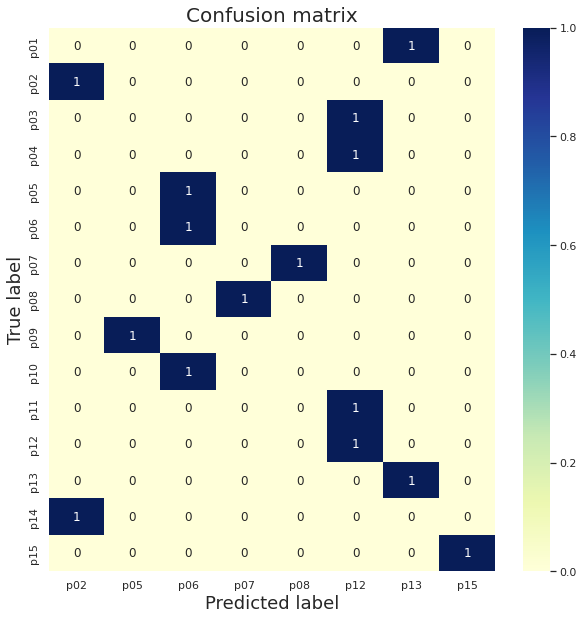

In [82]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)